# 1. Objectif du nettoyage

L'objectif de cette étape est des transformer les données brutes en données exploitables pour l'analyse, sans en modifier le sens ou la granularité.

Le nettoyage vise à :
- standardiser les noms de colonnes pour faciliter leur manipulation en Python/SQL
- identifier et formater la dimension temporelle
- filtrer un périmètre cohérent (géographique et périodique)
- sélectionner les variables utiles pour l'analyse
- préparer une table propre et stable pour les étapes suivantes

# 2. Chargement des fichiers

In [1]:
import pandas as pd

In [3]:
df_raw_insee_18 = pd.read_csv("../data/raw/insee/FD_csv_EEC18.csv", sep=";")
df_raw_insee_19 = pd.read_csv("../data/raw/insee/FD_EEC_2019.csv", sep=";")
df_raw_insee_20 = pd.read_csv("../data/raw/insee/FD_csv_EEC20.csv", sep=";")
df_raw_insee_21 = pd.read_csv("../data/raw/insee/FD_EEC_2021.csv", sep=";")
df_raw_insee_22 = pd.read_csv("../data/raw/insee/FD_EEC_2022.csv", sep=";")
df_raw_insee_23 = pd.read_csv("../data/raw/insee/FD_csv_EEC23.csv", sep=";")

In [6]:
df_raw_insee = pd.concat(
    [df_raw_insee_18, df_raw_insee_19, df_raw_insee_20, df_raw_insee_21, df_raw_insee_22, df_raw_insee_23
    ], ignore_index=True
)

In [8]:
df_insee = df_raw_insee.copy()

In [10]:
df_insee.shape

(2201159, 177)

In [11]:
df_insee.columns[:20]

Index(['ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7', 'AGE3', 'AGE5',
       'COURED', 'ENFRED', 'NFRRED', 'SEXE', 'ACTEU', 'ACTEU6', 'ACTIF',
       'ACTOP', 'AIDFAM', 'ANCCHOM', 'ANCINACT', 'CONTACT', 'CREACCP'],
      dtype='object')

In [15]:
df_insee[["ANNEE", "TRIM"]]

,ANNEE,TRIM
0,2018,1
1,2018,2
2,2018,3
3,2018,4
4,2018,1
...,...,...
2201154,2023,4
2201155,2023,4
2201156,2023,4
2201157,2023,4


In [16]:
df_insee["periode"] = pd.to_datetime(
    df_insee["ANNEE"].astype(str)
    + "-"
    + ((df_insee["TRIM"] - 1) * 3 +1).astype(str)
    + "-01"
)

In [17]:
df_insee["periode"]

0         2018-01-01
1         2018-04-01
2         2018-07-01
3         2018-10-01
4         2018-01-01
             ...    
2201154   2023-10-01
2201155   2023-10-01
2201156   2023-10-01
2201157   2023-10-01
2201158   2023-10-01
Name: periode, Length: 2201159, dtype: datetime64[ns]

In [19]:
df_insee_count = (
    df_insee
    .groupby("periode", as_index=False)
    .size()
    .rename(columns={"size": "nb_individus"})
)

In [20]:
df_insee_count.head(10)

,periode,nb_individus
0,2018-01-01,109060
1,2018-04-01,106698
2,2018-07-01,103691
3,2018-10-01,105122
4,2019-01-01,106400
5,2019-04-01,105777
6,2019-07-01,100733
7,2019-10-01,103388
8,2020-01-01,79576
9,2020-04-01,76601


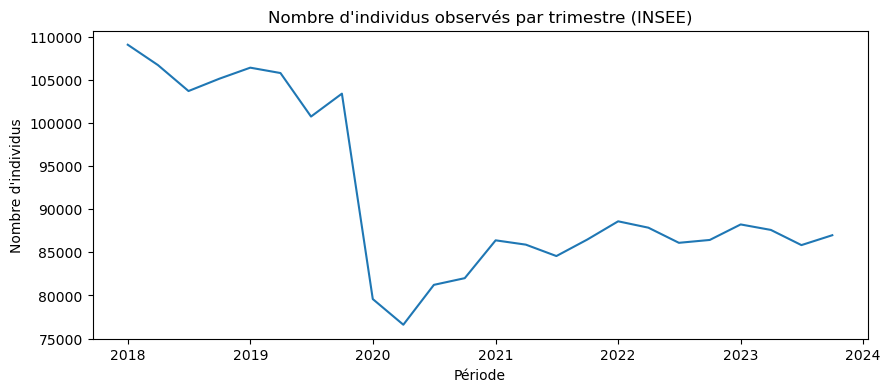

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df_insee_count["periode"], df_insee_count["nb_individus"])
plt.title("Nombre d'individus observés par trimestre (INSEE)")
plt.xlabel("Période")
plt.ylabel("Nombre d'individus")
plt.show()

In [23]:
df_insee_recent = df_insee[df_insee["periode"] >= "2018-01-01"]

In [24]:
df_insee_recent["periode"].min(), df_insee_recent["periode"].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2023-10-01 00:00:00'))

### Rôle des données INSEE

Les données issues de l’Enquête Emploi (INSEE) sont utilisées ici à des fins de contextualisation uniquement.

Une rupture est observée dans le nombre d’individus enquêtés par trimestre, probablement liée à des changements méthodologiques et à la période COVID.
En conséquence, ces données ne sont pas utilisées pour produire des volumes comparables dans le temps, mais pour éclairer le contexte de l’analyse DARES.